# Лабораторная работа №4. Кластеризация данных

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score


1 Задача “Оценка благонадежности заемщика банка”. Есть данные
заемщиков банка - физических лиц в файле credit.txt. По результатам характера
и результата погашений кредита все заемщики разделены на два класса:
благонадежный и неблагонадежный (зависимая переменная). Независимыми
переменными являются анкетные данные заемщиков:

- Возраст;

- Пол (0 – мужской, 1- женский);

- Семейное положение, состоит ли в браке (да/нет – 1/0);

- Количество иждивенцев;

- Подтвержденный совокупный располагаемый доход;

- Опыт работы, лет;

- Срок проживания в регионе, лет;

- Рыночная стоимость недвижимости в собственности, тыс.долл.;

- Ежемесячный платеж по кредиту, руб.;

- Зависимая переменная (1 – благонадежный, 0 – неблагонадежный
заемщик).

Распределение зависимой переменной следующее: 492 благонадежных
заемщика из 999.

Разбейте имеющийся датасет на обучающую и тестовую выборки.

Обучите
модель логистической регрессии и затем для тестовой выборки, считая, что
вердикт "благонадежный / неблагонадежный заемщик" не известен, предскажите его.

Сравните полученный результат с фактическими данными.

Оцените надежность построенной предсказательной модели с использованием
кросс-таблицы, метрик и ROC-анализа.

LogisticRegression: ROC AUC=0.964


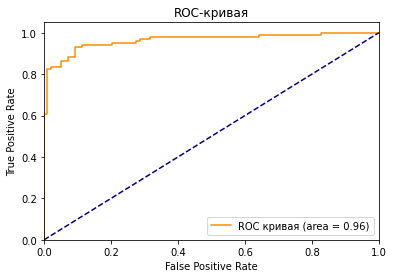

RMSE: 0.2678705087133946


In [52]:
# Ваш код здесь
df = pd.read_csv('credit.txt',sep=";")
Y = df['Благонадежный.заемщик']
X = df.drop('Благонадежный.заемщик',axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

# обучаем модель
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train, Y_train)
# получаем предказания
lr_probs = model.predict_proba(X_test)
# сохраняем вероятности только для положительного исхода
lr_probs = lr_probs[:, 1]
# рассчитываем ROC AUC
lr_auc = roc_auc_score(Y_test, lr_probs)
print('LogisticRegression: ROC AUC=%.3f' % (lr_auc))
# рассчитываем roc-кривую
fpr, tpr, treshold = roc_curve(Y_test, lr_probs)
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()
test_set_rmse = (np.sqrt(metrics.mean_squared_error(Y_test, lr_probs)))
print(f"RMSE: {test_set_rmse}")



2 Задача “Прогнозирование выживаемости на Титанике”.
Используйте уже знакомый Вам датасет о выживших и погибших пассажирах Титаника.

Исходя из логических соображений, отбросьте переменные, которые не могут влиять
на возможность пассажира выжить в катастрофе (обоснуйте сделанный выбор).

Затем, оставшиеся категориальные переменные (строки) закодируйте целыми
числами (например, 0 / 1 для мужчин и женщин).

Разбейте полученный датасет на обучающую и тестовую выборки.

Обучите модель логистической регрессии и затем для тестовой выборки, предскажите выжил ли пассажир.

Сравните полученный результат с фактическими данными.

Оцените надежность построенной предсказательной модели с использованием кросс-таблицы, метрик и ROC-анализа.

LogisticRegression: ROC AUC=0.864


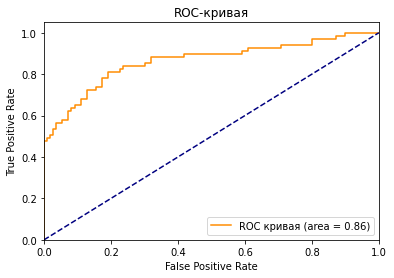

RMSE: 0.3667055553701493


In [128]:
# Ваш код здесь
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

df = pd.read_csv('titanic_train.csv')
df = df.replace('female', 0)
df = df.replace('male', 1)
df = df.fillna(0)

# df = clean_dataset(df)
# df.head()
Y = df.Survived
X = df.drop(['Name', 'Embarked','Cabin','Ticket','Survived'], axis = 1)
X.head(300)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)
# обучаем модель
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train, Y_train)
# получаем предказания
lr_probs = model.predict_proba(X_test)
# сохраняем вероятности только для положительного исхода
lr_probs = lr_probs[:, 1]
# рассчитываем ROC AUC
lr_auc = roc_auc_score(Y_test, lr_probs)
print('LogisticRegression: ROC AUC=%.3f' % (lr_auc))
# рассчитываем roc-кривую
fpr, tpr, treshold = roc_curve(Y_test, lr_probs)
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()
test_set_rmse = (np.sqrt(metrics.mean_squared_error(Y_test, lr_probs)))
print(f"RMSE: {test_set_rmse}")